In [130]:
import numpy as np
import pandas as pd
import nltk

In [131]:
ds=pd.read_clipboard()

In [132]:
ds.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [133]:
import re

In [134]:
from nltk.corpus import stopwords

In [135]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [136]:
r=ds['Review']

In [137]:
r.head()

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: Review, dtype: object

In [138]:
from nltk.stem import PorterStemmer
p

<PorterStemmer>

In [139]:
data=[]
for i in range(len(r)):    
    r1=r[i]
    r1=r1.lower() 
    r1=re.sub('[^a-z]',' ',r1)
    r1=r1.split()
    p=PorterStemmer()
    a=[]
    for word in r1 :
        if not word in stopwords.words('english'):
                p.stem(word)
                a.append(word)
              
    r1=' '.join(a)
    data.append(r1)
    
            
    

In [140]:
data

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great prices',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warmer',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place worth time let alone vegas',
 'like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care less interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food tables restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'also combo

In [141]:
from sklearn.feature_extraction.text import CountVectorizer

In [142]:
cv=CountVectorizer()

In [146]:
x=cv.fit_transform(data).toarray()

In [147]:
y=ds['Liked'].values

In [148]:
print(len(cv.get_feature_names()))
print(cv.get_feature_names())

1890
['absolute', 'absolutely', 'absolutley', 'accident', 'accommodations', 'accomodate', 'accordingly', 'accountant', 'ache', 'acknowledged', 'across', 'actual', 'actually', 'added', 'affordable', 'afternoon', 'ago', 'ahead', 'airline', 'airport', 'ala', 'albondigas', 'allergy', 'almonds', 'almost', 'alone', 'also', 'although', 'always', 'amazing', 'ambiance', 'ambience', 'amount', 'ample', 'andddd', 'angry', 'annoying', 'another', 'anticipated', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'apart', 'apologize', 'apology', 'app', 'appalling', 'apparently', 'appealing', 'appetite', 'appetizer', 'appetizers', 'apple', 'approval', 'area', 'arepas', 'aria', 'around', 'array', 'arrived', 'arrives', 'arriving', 'article', 'ask', 'asked', 'asking', 'assure', 'ate', 'atmosphere', 'atrocious', 'attached', 'attack', 'attention', 'attentive', 'attitudes', 'auju', 'authentic', 'average', 'avocado', 'avoid', 'avoided', 'away', 'awesome', 'awful', 'awkward', 'awkwardly', 'ayce',

In [149]:
from sklearn.cross_validation import train_test_split

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [151]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 1890), (200, 1890), (800,), (200,))

In [152]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [153]:
gn=GaussianNB()
mn=MultinomialNB()

In [154]:
gn.fit(x_train,y_train)
mn.fit(x_train,y_train)
y_pred_g=gn.predict(x_test)
y_pred_m=mn.predict(x_test)

In [161]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [156]:
cm_g=confusion_matrix(y_test,y_pred_g)
cm_m=confusion_matrix(y_test,y_pred_m)
cr_g=classification_report(y_test,y_pred_g)
cr_m=classification_report(y_test,y_pred_g)

In [164]:
accuracy_m=accuracy_score(y_test,y_pred_m)
accuracy_m

0.75

In [157]:
import seaborn as sb

In [158]:
import matplotlib.pyplot as plt

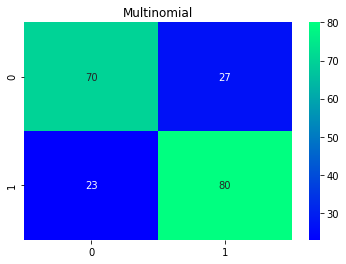

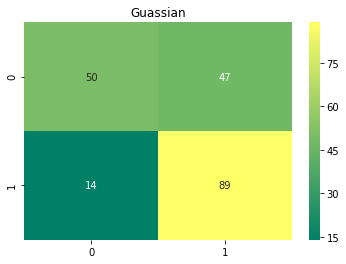

In [159]:
sb.heatmap(cm_m,annot=True,cmap='winter')
plt.title('Multinomial')
plt.show()
sb.heatmap(cm_g,annot=True,cmap='summer')
plt.title('Guassian')
plt.show()

In [165]:
print(cr_m)

             precision    recall  f1-score   support

          0       0.78      0.52      0.62        97
          1       0.65      0.86      0.74       103

avg / total       0.72      0.69      0.68       200



In [166]:
print(cr_g)

             precision    recall  f1-score   support

          0       0.78      0.52      0.62        97
          1       0.65      0.86      0.74       103

avg / total       0.72      0.69      0.68       200

